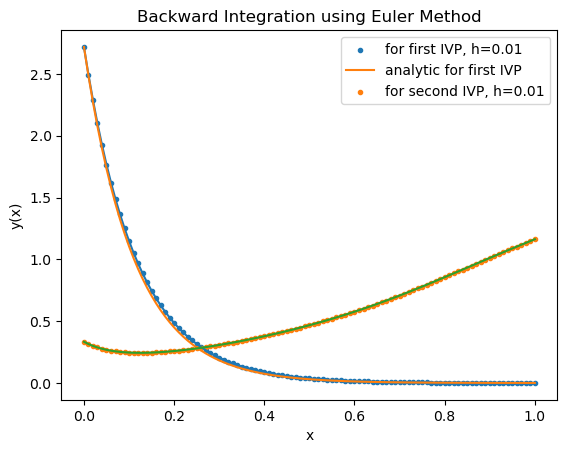

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Function representing the first differential equation
def f1(x, y):
    return -9 * y

# Function representing the second differential equation
def f2(x, y):
    return -20 * (y - x)**2 + 2 * x

# Euler's method for backward integration
def backward_euler(f, x0, xn, h, y0):
    # Number of steps
    n = int((xn - x0) / h)

    # Array to store x values
    x_vals = [x0]
    for i in range (n):
        x_vals.append(x_vals[i]+h)
    
    # implicit euler's function
    def eul_func(y_next,args):
        return(y_next - args[1] - h*f(args[0],y_next))
    
    # We will use secant method to solve :
    
    def secant_method(f, x0, x1,args, tol=1e-6, max_iter=100):
        iter_count = 0
        while abs(x1 - x0) > tol and iter_count < max_iter:
            x_next = x1 - f(x1,args) * (x1 - x0) / (f(x1,args) - f(x0,args))
            x0 = x1
            x1 = x_next
            iter_count += 1
        return x1, iter_count
    
    y_arr=np.zeros(len(x_vals))         
    y_arr[0]=y0
    for i in range(len(x_vals)-1):
        root=secant_method(eul_func,y0,y0+1,args = [x_vals[i+1], y_arr[i]])[0]
        y_arr[i+1]=root
    
    return x_vals,y_arr


# Define initial conditions and parameters for the first problem
x0_1 = 0
y0_1 = np.exp(1)  # Initial condition y(0) = e
xn_1 = 1
h_1 = 0.01

# Solve the first initial value problem
x_1, y_1 = backward_euler(f1, x0_1, xn_1, h_1, y0_1)

"""
# Print the results for the first problem
print("First Initial Value Problem:")
print("x values:", x_1)
print("y values:", y_1)
"""
def analytic_soln_f1(x):
    return np.exp((-9*x)+1)

plt.plot(x_1,y_1)
plt.scatter(x_1,y_1,marker=".",label="for first IVP, h="+str(h_1))
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Backward Integration using Euler Method")
plt.grid()
plt.plot(x_1,analytic_soln_f1(np.array(x_1)),label="analytic for first IVP")
plt.legend()
# Define initial conditions and parameters for the second problem
x0_2 = 0
y0_2 = 1/3  # Initial condition y(0) = 1/3
xn_2 = 1
h_2 = 0.01

# Solve the second initial value problem
x_2, y_2 = backward_euler(f2, x0_2, xn_2, h_2, y0_2)

"""
# Print the results for the second problem
print("\nSecond Initial Value Problem:")
print("x values:", x_2)
print("y values:", y_2)
"""

plt.plot(x_2,y_2)
plt.scatter(x_2,y_2,marker=".",label="for second IVP, h="+str(h_2))
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Backward Integration using Euler Method")
plt.grid()
plt.legend()